# Modelling of physical systems - assignment for lab03
## Author: Przemysław Maresz

## Convergence Analysis of the Upwind Scheme

This notebook performs a convergence analysis of the upwind scheme for solving the linear advection equation. The goal of the analysis is to investigate how the numerical error, measured here by the Root Mean Squared Error (RMSE) between the numerical solution and the analytic solution, changes with respect to the spatial step size ($dx$). Additionally, by keeping the Courant number $C$ constant and by varying it (e.g., $C=0.2$, $C=0.5$, $C=0.8$), we can explore how the convergence rate depends on $C$.

### Analysis Approach

1. **Physical Setup and Numerical Method:**
   - We define an initial condition given by a Gaussian profile.
   - The upwind scheme is implemented to numerically solve the advection equation.

2. **Error Measure:**
   - The RMSE is used to quantify the difference between the numerical solution and the analytic (exact) solution.

3. **Convergence Study:**
   - For a range of spatial step sizes $dx$, the corresponding temporal step $dt$ is determined using the fixed Courant number $C = \frac{u \cdot dt}{dx}$.
   - The simulation is run for each $dx$ value until a fixed final time $t_{\text{max}}$.
   - RMSE is computed for each simulation to assess the convergence of the method.

4. **Visualization:**
   - A plot of RMSE versus $dx$ is generated to visually confirm that as the grid is refined (i.e., $dx$ decreases), the numerical error decreases.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot

In [3]:
class Psi_0:
    def __init__(self, x0=5, a=1, sigma=25):
      self.x0 = x0
      self.a = a
      self.sigma = sigma

    def __call__(self, x):
        return self.a * np.exp(-(x-self.x0)**2 / 2 / self.sigma**2)

class One:
  def __radd__(self, o):
    return slice(o.start+1, o.stop+1)

  def __rsub__(self, o):
    return slice(o.start-1, o.stop-1)

In [4]:
def upwind(x, psi_0, u, dt, nt):
  nx = len(x)
  psi = psi_0(x)
  i = slice(1, nx-2)
  one = One()
  dx = x[1] - x[0]
  C = u * dt / dx

  def F(psi_L, psi_R, C):
    return (C + abs(C)) / 2 * psi_L + (C - abs(C)) / 2 * psi_R


  for _ in range(nt):
    psi[i] = psi[i] - (F(psi[i], psi[i+one], C) - F(psi[i-one], psi[i], C))

  return psi

In [5]:
def rmse(psi_num, psi_an):
  return np.sqrt(np.mean((psi_num - psi_an)**2))

In [6]:
def spatial_convergence(u=1, t_max=50, C_target=0.5, min=-100, max=100, dx_min=0.5, dx_max=5):
  psi0 = Psi_0()
  dx_val = np.linspace(dx_min, dx_max, 100)
  rmse_list = []

  for dx in dx_val:

    nx = int((max - min) / dx)
    x = np.linspace(min, max, nx, endpoint=False)

    dt = C_target * dx / u
    nt = int(t_max / dt)

    psi_num = upwind(x, psi0, u, dt, nt)
    psi_an = psi0(x - u * t_max)

    error = rmse(psi_num, psi_an)
    rmse_list.append(error)


  fig = plt.figure(figsize=(8,5))
  plt.plot(dx_val, rmse_list)
  plt.xlabel("dx (spatial step)")
  plt.ylabel("RMSE")
  plt.title(f"Convergence analysis of the upwind scheme\nC = {C_target}  u = {u}")
  plt.grid(True, which="both", ls="--")
  show_plot(fig=fig)

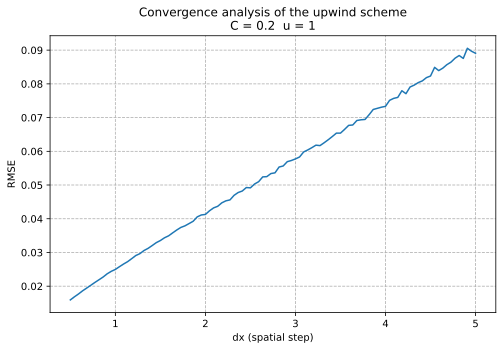

In [7]:
spatial_convergence(C_target=0.2)

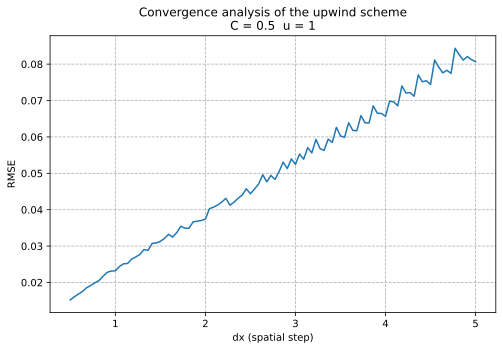

In [8]:
spatial_convergence(C_target=0.5)

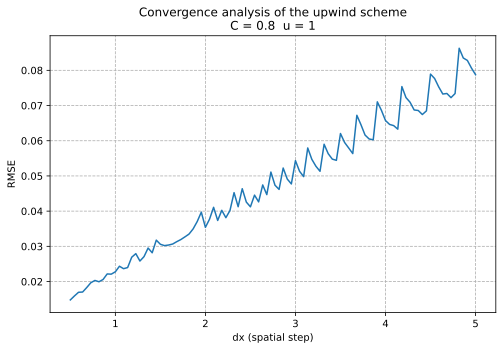

In [9]:
spatial_convergence(C_target=0.8)

## Conclusions

1. **Error Decrease with Finer Grids:**  
   As $dx$ decreases, the RMSE between the numerical and analytic solutions generally decreases, confirming the first-order convergence of the upwind scheme.

2. **Impact of the Courant Number:**  
   Although changing $C$ does not alter the theoretical order of convergence, it can affect the error magnitude and smoothness of the convergence plot. Values of $C$ away from 0 or 1 help avoid trivial or unstable cases.

3. **Accuracy vs. Computational Cost:**  
   Finer grids require smaller $dt$ to maintain a fixed $C$, increasing the number of time steps and computational cost.
